# Worldbank data on Israel
The data on Israel comes from: [Israel](https://data.worldbank.org/country/china?view=chart)
You need to download the CSV file from the website and then move it to the same folder as this jupyter notebook.

It contains economic data, demographics, human development metrics and climate change related stats.

Two important questions I would like to examine are:
1. How much better off is the average Israeli today than a few decades ago?
2. How well does GDP/capita of Israel translate into a higher human development index?

## Importing data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('israel-worldbank-data/isr_data.csv',skiprows=3)
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,2.160000e+02,2.420000e+02,2.100000e+02,2.070000e+02,2.150000e+02,2.600000e+02,2.610000e+02,2.680000e+02,2.610000e+02,2.720000e+02,...,9.430000e+02,9.400000e+02,9.660000e+02,9.310000e+02,9.180000e+02,8.900000e+02,8.340000e+02,7.600000e+02,4.840000e+02,0.0
mean,4.193362e+08,4.180420e+08,5.181139e+08,5.836066e+08,6.058355e+08,5.696504e+08,5.703530e+08,5.747702e+08,6.861662e+08,7.460954e+08,...,3.293915e+10,3.510099e+10,3.584951e+10,3.830329e+10,4.079481e+10,4.426028e+10,4.937943e+10,5.265128e+10,7.565124e+10,NaN
std,5.319040e+09,5.589714e+09,6.608224e+09,7.368040e+09,7.804012e+09,7.742756e+09,7.723157e+09,7.849938e+09,9.246777e+09,1.028802e+10,...,1.344916e+11,1.422818e+11,1.475821e+11,1.556217e+11,1.649160e+11,1.749599e+11,1.887183e+11,1.970214e+11,2.392013e+11,NaN
min,-3.050000e+08,-3.960000e+08,-4.000000e+04,-5.000000e+05,-6.240000e+06,-4.560000e+08,-3.890000e+08,-4.650000e+08,-6.080000e+08,-7.700000e+08,...,-4.370171e+10,-4.128363e+10,-2.698839e+10,-1.352310e+10,-1.875565e+10,-1.360481e+10,-4.464787e+10,-5.421397e+10,-1.790880e+10,NaN
25%,4.156296e+00,4.882380e+00,4.680145e+00,5.136610e+00,4.393760e+00,5.180673e+00,4.938626e+00,4.926191e+00,4.912617e+00,4.541617e+00,...,5.118837e+00,5.840433e+00,5.720843e+00,5.497774e+00,5.359369e+00,5.422118e+00,5.623030e+00,5.929498e+00,6.000000e+00,NaN
50%,2.740366e+01,2.811104e+01,2.717885e+01,2.412200e+01,2.426063e+01,2.419585e+01,2.426063e+01,2.572250e+01,2.601351e+01,2.590268e+01,...,4.758383e+01,4.814200e+01,4.862097e+01,4.958747e+01,4.488750e+01,5.735465e+01,5.198820e+01,5.541917e+01,6.216650e+01,NaN
75%,3.184232e+05,9.483425e+04,9.615000e+03,1.996100e+04,2.185500e+04,1.454890e+05,7.185600e+04,7.925000e+04,8.214600e+04,6.602414e+04,...,5.816500e+03,8.718750e+03,5.319750e+03,1.533088e+04,1.871400e+04,2.140381e+04,4.187759e+04,1.518657e+05,1.896750e+09,NaN
max,7.812574e+10,8.687885e+10,9.570237e+10,1.059384e+11,1.143470e+11,1.247456e+11,1.246463e+11,1.283795e+11,1.492308e+11,1.694750e+11,...,1.045250e+12,1.095184e+12,1.140358e+12,1.166354e+12,1.230954e+12,1.283315e+12,1.341581e+12,1.418449e+12,1.490370e+12,NaN


## Data Analysis

### Array of columns and index array

In [5]:
# array of columns
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

In [6]:
# helper function to display rows and corresponding index
def find_rows(df,phrase):
    for i in range(len(df)):
        indicator = df.iloc[i]['Indicator Name']
        if phrase in indicator:
            print(i,indicator)

In [7]:
#display index array + associated rows
find_rows(df,'')

0 Internally displaced persons, new displacement associated with disasters (number of cases)
1 Merchandise exports to low- and middle-income economies in Latin America & the Caribbean (% of total merchandise exports)
2 Medium and high-tech exports (% manufactured exports)
3 Merchandise imports from low- and middle-income economies outside region (% of total merchandise imports)
4 Tariff rate, applied, simple mean, primary products (%)
5 Tariff rate, applied, simple mean, manufactured products (%)
6 Unmet need for contraception (% of married women ages 15-49)
7 Population, female
8 Population ages 65 and above, total
9 Population ages 40-44, female (% of female population)
10 Population ages 15-19, female (% of female population)
11 Female headed households (% of households with a female head)
12 Mortality rate, adult, female (per 1,000 female adults)
13 Unemployment, total (% of total labor force) (national estimate)
14 Unemployment with advanced education, female (% of female labor fo

969 Women who believe a husband is justified in beating his wife (any of five reasons) (%)
970 Expenditure on secondary education (% of government expenditure on education)
971 Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)
972 Trained teachers in upper secondary education (% of total teachers)
973 School enrollment, secondary, female (% gross)
974 Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative)
975 Adjusted net enrollment rate, primary, female (% of primary school age children)
976 School enrollment, primary, private (% of total primary)
977 Pupil-teacher ratio, primary
978 School enrollment, preprimary (% gross)
979 Coverage of social insurance programs in richest quintile (% of population)
980 Coverage of unemployment benefits and ALMP in richest quintile (% of population)
981 Terms of trade adjustment (constant LCU)
982 GNI per capita (constant LCU)
983 Gross domestic savings (current 

### Plotting GDP/capita of Israel

Text(0.5, 1.0, 'GDP/capita in $')

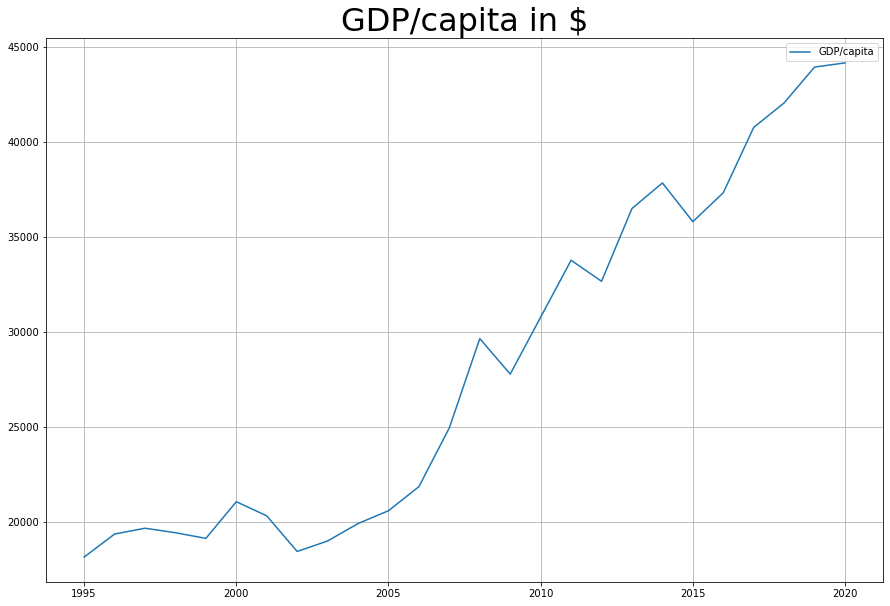

In [8]:
def plot_indicator(df,row,label):
    plt.plot(range(1990,2021),df.iloc[row]['1990':'2020'],label=label)
plt.figure(figsize=(15,10))
plot_indicator(df,198,'GDP/capita')
plt.legend()
plt.grid()
plt.title('GDP/capita in $', fontsize=32)

Text(0.5, 1.0, 'Imports')

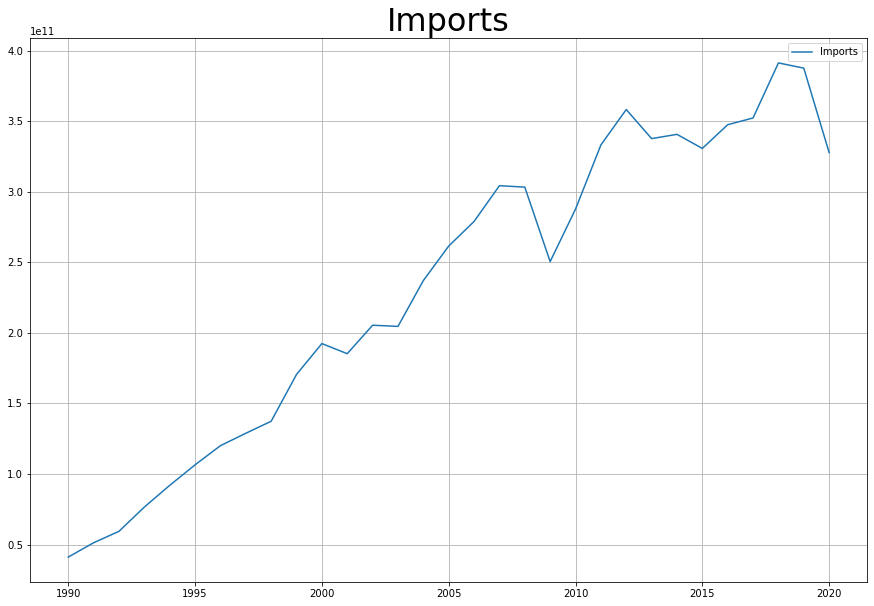

In [9]:
def plot_indicator(df,row,label):
    plt.plot(range(1990,2021),df.iloc[row]['1990':'2020'],label=label)
plt.figure(figsize=(15,10))
plot_indicator(df,204,'Imports')
plt.legend()
plt.grid()
plt.title('Imports', fontsize=32)

In [10]:
df2 = pd.pivot_table(df, values=['2000', '2005', '2010', '2019'], index=[], columns=['Indicator Name'])
df2

Indicator Name,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adjusted net enrollment rate, primary (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2015 US$),Adjusted net national income (current US$),Adjusted net national income per capita (annual % growth),Adjusted net national income per capita (constant 2015 US$),...,Urban population growth (annual %),Urban population living in areas where elevation is below 5 meters (% of total population),"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Wholesale price index (2010 = 100),Women Business and the Law Index Score (scale 1-100)
2000,100.0,100.0,100.0,100.0,97.85012,5.913972,1.462292e+11,1.068612e+11,3.152024,23251.581952,...,2.712531,1.246779,5.21,8.68,7.13,93.410004,84.269997,88.360001,58.530450,78.125
2005,100.0,100.0,100.0,100.0,97.54599,5.660400,1.632353e+11,1.191261e+11,3.814038,23554.541161,...,1.830669,NaN,5.33,9.34,7.51,93.180000,83.949997,88.169998,73.795819,75.000
2010,100.0,100.0,100.0,100.0,97.38332,6.328711,2.033302e+11,1.976578e+11,4.403982,26671.157594,...,1.895387,1.249319,5.89,9.69,7.91,92.599998,83.750000,87.879997,100.000000,77.500
2019,100.0,100.0,100.0,100.0,NaN,4.890156,3.064952e+11,3.407749e+11,2.906812,33851.908058,...,1.998758,NaN,7.64,9.02,8.37,90.580002,85.089996,87.690002,135.091338,80.625


Text(0.5, 1.0, 'income vs price index vs savings')

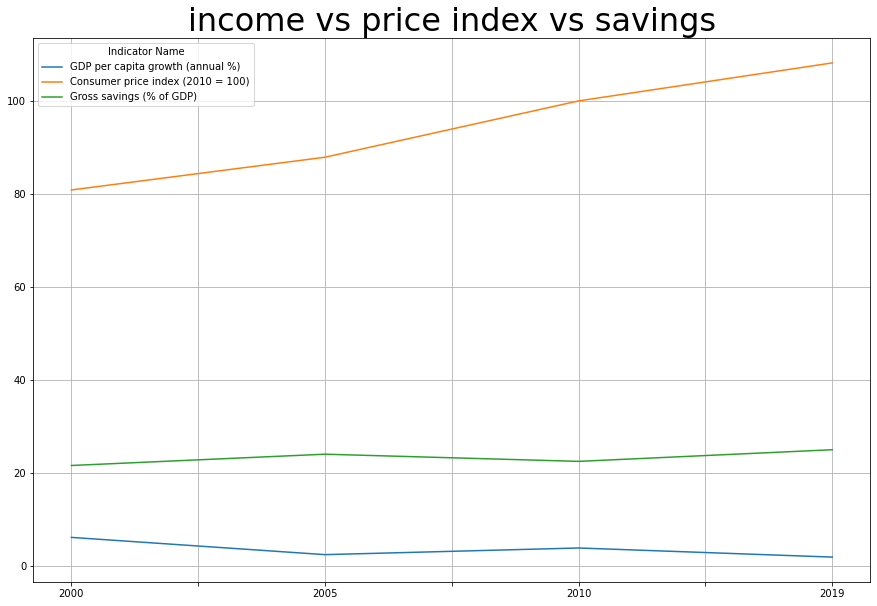

In [11]:
df2[['GDP per capita growth (annual %)','Consumer price index (2010 = 100)', 'Gross savings (% of GDP)']].plot(figsize=(15,10))
plt.grid()
plt.title('income vs price index vs savings',fontsize=32)

In [66]:
# groupby 2019 and show all indicators
current = df['Indicator Name'].groupby(df['2019'])
current.head(10)

0       Internally displaced persons, new displacement...
1       Merchandise exports to low- and middle-income ...
2       Medium and high-tech exports (% manufactured e...
3       Merchandise imports from low- and middle-incom...
4       Tariff rate, applied, simple mean, primary pro...
                              ...                        
1424        Bank liquid reserves to bank assets ratio (%)
1438          S&P Global Equity Indices (annual % change)
1439           Primary income receipts (BoP, current US$)
1440                   Current account balance (% of GDP)
1441                         Trade in services (% of GDP)
Name: Indicator Name, Length: 766, dtype: object

## Discussion
Basically, we can see that Israel's economy has been doing pretty well over the past few years. We have solid growth of GDP/capita (measure of average income per person), which corresponds to an increase in imports. This means Israelis are making more than before, and this is allowing the average person in Israel to buy more goods from abroad (tech, fashion etc). Nonetheless, it is important to point out the data displayed in the pivot table. Essentially, we can see that while the consumer price index has been steadily growing, Israelis savings as % of GDP have remained approximately the same, and the same is true for GDP/capita growth rate, which suggests prices for goods have been growing at a faster pace than the income of individual Israelis. Thus, their savings will remain roughly the same or even decline, as they need to spend a larger % of their income on goods. 